In [1]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import date

In [2]:
today = date.today().strftime("%Y-%m-%d")
# Get today's date as datetime
TDY = pd.Timestamp.today()
TWK = TDY.isocalendar().week
print('Today is :', today, '// Week:', TWK)

Today is : 2024-06-24 // Week: 26


In [3]:
import os
os.getcwd()
os.chdir('C:/Users/tbijoych/OneDrive - purdue.edu/3.Research/Dashboard')

In [4]:
SM = pd.read_excel('./ACRE_0111.xlsx', 'Export')
# df_Soybean=df_Soybean.iloc[1:168, : 26] 

# df_Soybean['Date'] = pd.to_datetime(df_Soybean['Date'])
SM.columns=['Date', 'Sensor1','Sensor2','sensor3','sensor4']
SM=SM.dropna()
SM['Sensor2']=pd.to_numeric(SM['Sensor2'])
SM.head()

,Date,Sensor1,Sensor2,sensor3,sensor4
0,2023-05-01 00:09:58,3276.7,3276.7,0.0,0.0
1,2023-05-01 00:19:55,3276.7,3276.7,0.0,0.0
2,2023-05-01 00:29:58,3276.7,3276.7,0.0,0.0
3,2023-05-01 00:39:55,3276.7,3276.7,0.0,0.0
4,2023-05-01 00:49:55,3276.7,3276.7,0.0,0.0


In [5]:
SM=SM[SM['Sensor1']<3276]
SM=SM[SM['Sensor2']<3276]
df=SM

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Resample to hourly intervals and aggregate using mean (assuming you want to average Sensor1, Sensor2, Sensor3, Sensor4)
df_hourly = df.resample('H').sum()
df_hourly.head

<bound method NDFrame.head of                      Sensor1  Sensor2  sensor3  sensor4
Date                                                   
2023-05-11 16:00:00     41.1     54.0     47.1     40.2
2023-05-11 17:00:00     99.6    200.3    177.5    144.7
2023-05-11 18:00:00    106.1    190.0    169.6    139.4
2023-05-11 19:00:00     98.9    205.4    184.5    150.1
2023-05-11 20:00:00     98.4    207.3    187.3    152.0
...                      ...      ...      ...      ...
2023-09-30 07:00:00     39.8     58.6     60.2     56.0
2023-09-30 08:00:00     39.7     58.6     60.2     56.0
2023-09-30 09:00:00     39.6     58.4     60.2     56.0
2023-09-30 10:00:00     39.6     58.4     60.2     56.0
2023-09-30 11:00:00     39.8     58.4     60.2     56.0

[3404 rows x 4 columns]>

In [7]:
# Calculate difference from previous hour for each sensor column
diff_df = df_hourly.diff()

# Reset index to make 'Date' a column again (if needed)
diff_df.reset_index(inplace=True)

In [8]:
filtered_df = diff_df[(diff_df['Date'].dt.hour >= 0) & (diff_df['Date'].dt.hour < 5)]
filtered_df.head(2)

,Date,Sensor1,Sensor2,sensor3,sensor4
8,2023-05-12 00:00:00,-0.1,0.8,1.7,1.4
9,2023-05-12 01:00:00,15.8,35.9,34.0,27.9


In [9]:
dat=filtered_df[['Date','sensor4']]
#dat=dat[dat['sensor4']>0]
dat

,Date,sensor4
8,2023-05-12 00:00:00,1.4
9,2023-05-12 01:00:00,27.9
10,2023-05-12 02:00:00,1.3
11,2023-05-12 03:00:00,1.3
12,2023-05-12 04:00:00,1.2
...,...,...
3392,2023-09-30 00:00:00,-28.0
3393,2023-09-30 01:00:00,28.0
3394,2023-09-30 02:00:00,0.0
3395,2023-09-30 03:00:00,0.0


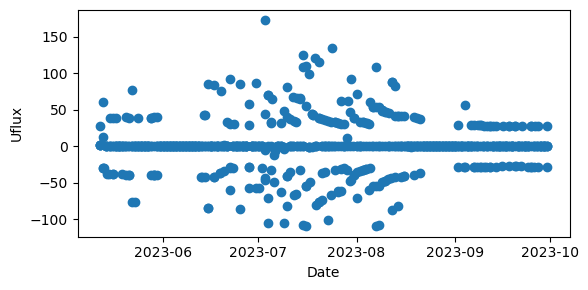

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 3))

# First plot for Total_ET vs Total_ET_ref
ax1.set_xlabel('Date')
ax1.set_ylabel('Uflux')
ax1.scatter(dat['Date'], dat['sensor4'])
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\tbijoych\AppData\Local\Temp\ipykernel_25096\2109971504.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


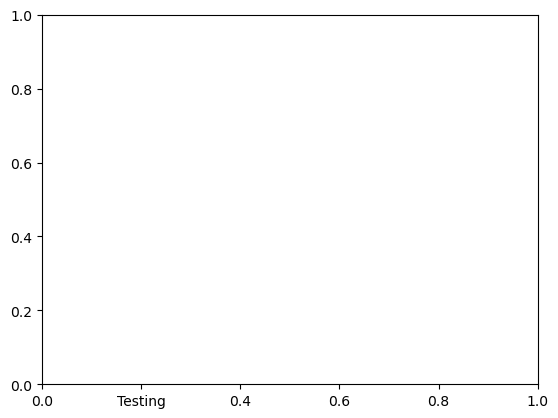

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

ax.set_xticklabels(labels)

plt.show()